In [45]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from patsy import dmatrices
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

In [46]:
seed = 3

df = pd.read_csv("Auto.csv")
df['origin'] = df['origin'].astype('category')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print(df.dtypes)
df.head(5)

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
year               int64
origin          category
name              object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [47]:
def linearRegression(df, model_formula, seed=1, print_mse=False):
    np.random.seed(seed)
    mask = np.random.rand(len(df)) < 0.8
    train_set = df[mask]
    test_set = df[~mask]

    train_y, train_x = dmatrices(model_formula, data=train_set, return_type="dataframe")
    valid_y, valid_x = dmatrices(model_formula, data=test_set, return_type="dataframe")

    model = sm.OLS(train_y, train_x)
    result = model.fit()

    train_y_pred = result.predict(train_x)
    valid_y_pred = result.predict(valid_x)
    train_mse = metrics.mean_squared_error(train_y, train_y_pred)
    valid_mse = metrics.mean_squared_error(valid_y, valid_y_pred)
    
    if print_mse == True:
        print(f"MSE_Train: {train_mse}")
        print(f"MSE_Test: {valid_mse}\n")

    return result, {"train": train_mse, "valid": valid_mse}

In [48]:
result,_ = linearRegression(df, "mpg ~ horsepower", print_mse=True)
result.summary()

MSE_Train: 24.99823583937004
MSE_Test: 20.77117632799267



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     465.5
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           2.11e-63
Time:                        22:21:16   Log-Likelihood:                -932.73
No. Observations:                 308   AIC:                             1869.
Df Residuals:                     306   BIC:                             1877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5555      0.821     49.392      0.000      38.940      42.171
horsepower    -0.1602      0.007    -21.574      0.000      -0.175      -0.146
==============================================================================
Omnibus:                       11.228   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.400
Skew:                           0.449   Prob(JB):                      0.00335
Kurtosis:                       3.284   Cond. No.                         318.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                   mpg  cylinders  displacement  horsepower    weight  acceleration      year
mpg           1.000000  -0.776260     -0.804443   -0.778427 -0.831739      0.422297  0.581469
cylinders    -0.776260   1.000000      0.950920    0.842983  0.897017     -0.504061 -0.346717
displacement -0.804443   0.950920      1.000000    0.897257  0.933104     -0.544162 -0.369804
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538     -0.689196 -0.416361
weight       -0.831739   0.897017      0.933104    0.864538  1.000000     -0.419502 -0.307900
acceleration  0.422297  -0.504061     -0.544162   -0.689196 -0.419502      1.000000  0.282901
year          0.581469  -0.346717     -0.369804   -0.416361 -0.307900      0.282901  1.000000


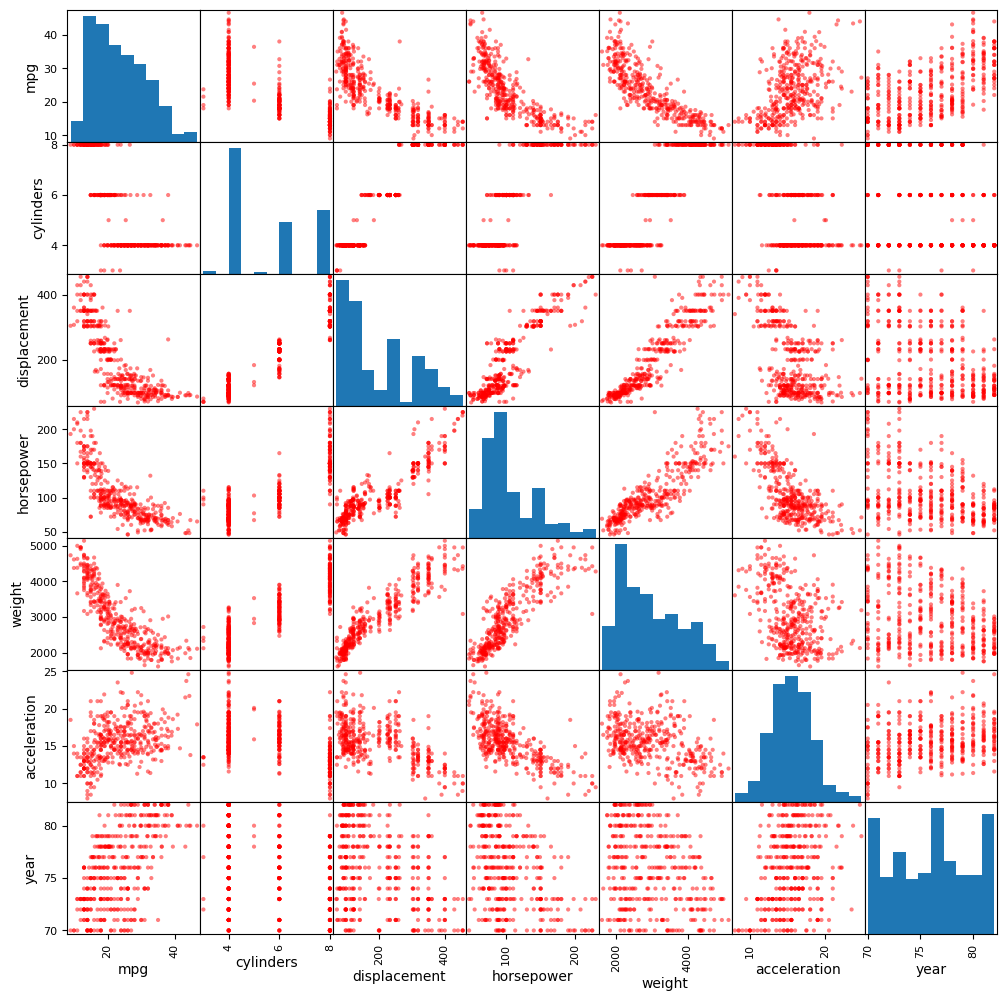

In [49]:
pd.set_option('display.width', 1000)
print(df.corr())
axis = pd.plotting.scatter_matrix(df,color="red",figsize=(12,12))

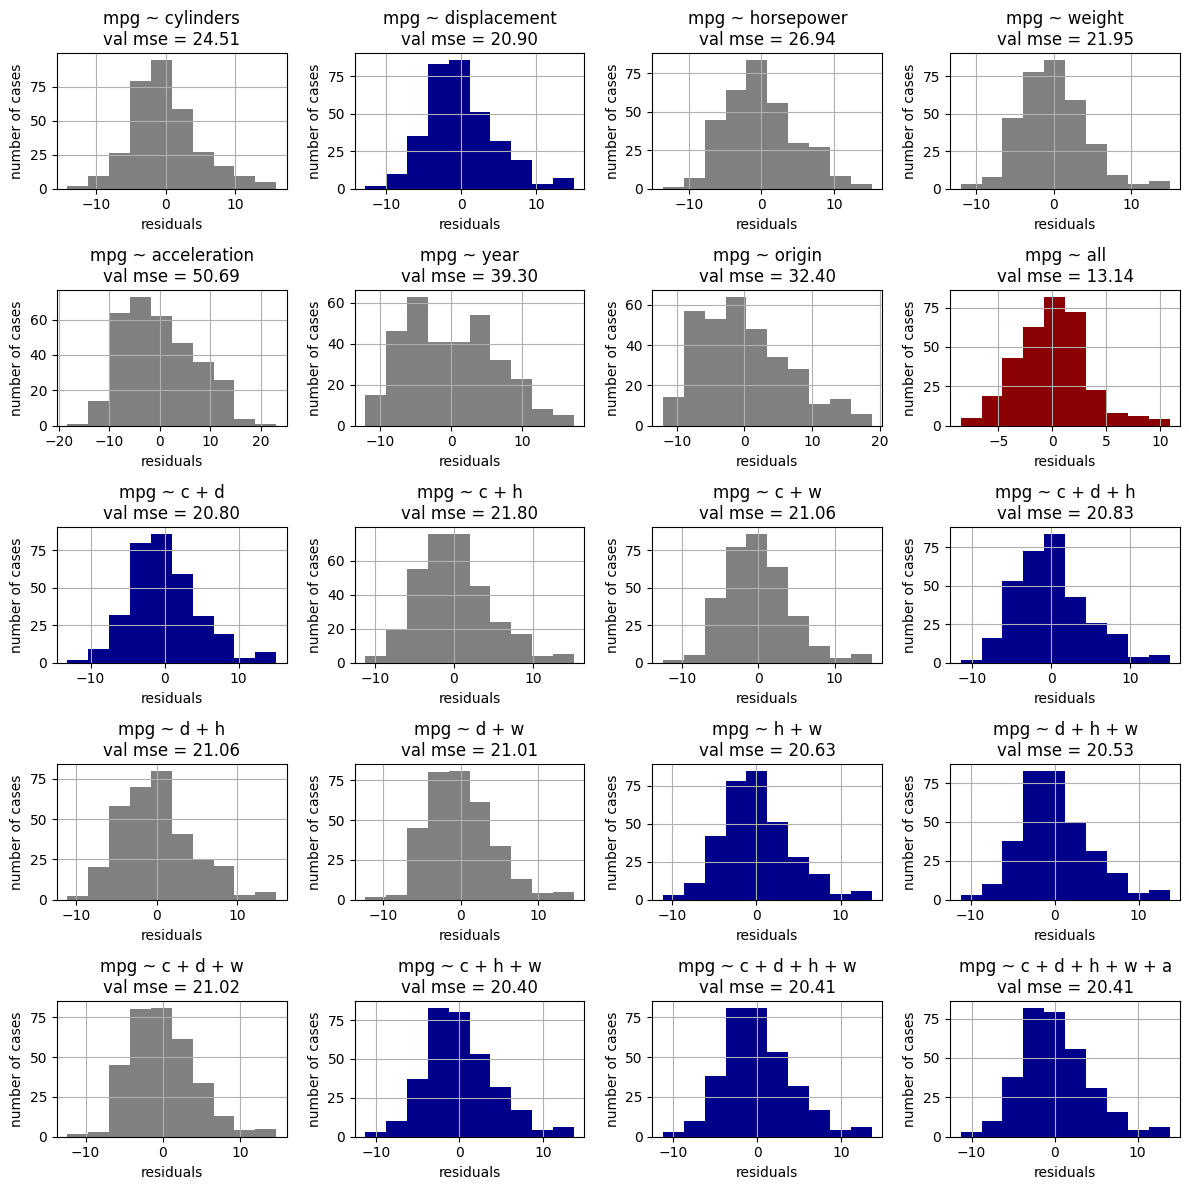

In [50]:
models = [
    "mpg ~ cylinders",
    "mpg ~ displacement",
    "mpg ~ horsepower",
    "mpg ~ weight",
    "mpg ~ acceleration",
    "mpg ~ year",
    "mpg ~ origin",
    
    "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin",
    
    "mpg ~ cylinders + displacement",
    "mpg ~ cylinders + horsepower ",
    "mpg ~ cylinders + weight",
    "mpg ~ cylinders + displacement + horsepower",
    
    "mpg ~ displacement + horsepower",
    "mpg ~ displacement + weight",
    "mpg ~ horsepower + weight",
    "mpg ~ displacement + horsepower + weight",
    
    "mpg ~ cylinders + displacement + weight",
    "mpg ~ cylinders + horsepower + weight",
    "mpg ~ cylinders + displacement + horsepower + weight",
    "mpg ~ cylinders + displacement + horsepower + weight + acceleration"
]

model_name = [model for model in models]
model_name[7] = "mpg ~ all"
model_name[8] = "mpg ~ c + d"
model_name[9] = "mpg ~ c + h"
model_name[10] = "mpg ~ c + w"
model_name[11] = "mpg ~ c + d + h"
model_name[12] = "mpg ~ d + h"
model_name[13] = "mpg ~ d + w"
model_name[14] = "mpg ~ h + w"
model_name[15] = "mpg ~ d + h + w"
model_name[16] = "mpg ~ c + d + w"
model_name[17] = "mpg ~ c + h + w"
model_name[18] = "mpg ~ c + d + h + w"
model_name[19] = "mpg ~ c + d + h + w + a"

fig = plt.figure(figsize=(12, 12))
i = 1
for model in models:
    fig.add_subplot(5, 4, i)
    result, mse = linearRegression(df, model, seed)
    color = "gray" if mse["valid"] > 21 else "darkblue"
    ax = result.resid.hist(color=color if mse["valid"] > 15 else "darkred")
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(f"{model_name[i-1]}\nval mse = {mse['valid']:.2f}")
    plt.tight_layout()
    i = i + 1

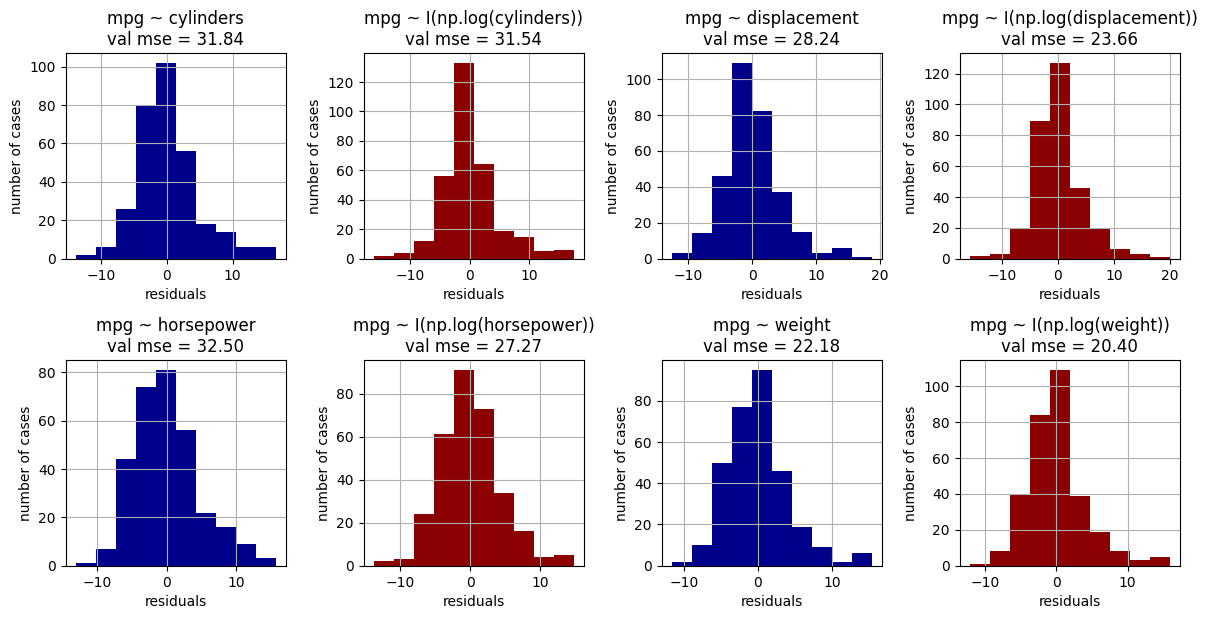

In [51]:
models = [
    "mpg ~ cylinders",
    "mpg ~ I(np.log(cylinders))",
    "mpg ~ displacement",
    "mpg ~ I(np.log(displacement))",
    "mpg ~ horsepower",
    "mpg ~ I(np.log(horsepower))",
    "mpg ~ weight",
    "mpg ~ I(np.log(weight))",
]

seed = np.random.randint(2**32)

fig = plt.figure(figsize=(12, 12))
i = 1
for model in models:
    fig.add_subplot(4, 4, i)
    result, mse = linearRegression(df, model, seed)
    ax = result.resid.hist(color="darkblue" if i%2==1 else "darkred")
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(f"{models[i-1]}\nval mse = {mse['valid']:.2f}")
    plt.tight_layout()
    i = i + 1

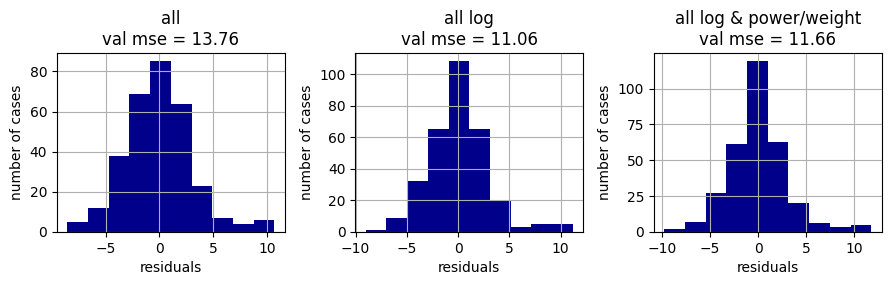

In [52]:
models = [
    "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin",
    "mpg ~ I(np.log(cylinders)) + I(np.log(displacement)) + I(np.log(horsepower)) + \
        I(np.log(weight)) + I(np.log(acceleration)) + year + origin",
    "mpg ~ I(np.log(cylinders)) + I(np.log(displacement)) + I(np.log(horsepower)):I(np.log(weight)) +\
        I(np.log(acceleration)) + year + origin",
    
]

model_name = ["all", "all log", "all log & power/weight",]

fig = plt.figure(figsize=(12, 12))
i = 1
for model in models:
    fig.add_subplot(5, 4, i)
    result, mse = linearRegression(df, model, seed)
    ax = result.resid.hist(color="darkblue")
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(f"{model_name[i-1]}\nval mse = {mse['valid']:.2f}")
    plt.tight_layout()
    i = i + 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     211.2
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          2.58e-119
Time:                        22:21:28   Log-Likelihood:                -782.55
No. Observations:                 313   AIC:                             1583.
Df Residuals:                     304   BIC:                             1617.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 107.5675     10.651     10.099      0.000      86.608     128.527
origin[T.2]                 1.8296      0.651      2.812      0.005       0.549       3.110
origin[T.3]                 1.8163      0.622      2.920      0.004       0.592       3.040
I(np.log(cylinders))        0.6301      1.806      0.349      0.727      -2.923       4.184
I(np.log(displacement))    -0.3661      1.723     -0.212      0.832      -3.757       3.025
I(np.log(horsepower))      -6.6153      1.727     -3.830      0.000     -10.014      -3.217
I(np.log(weight))         -12.2561      2.484     -4.934      0.000     -17.144      -7.368
I(np.log(acceleration))    -4.2985      1.826     -2.354      0.019      -7.892      -0.705
year                        0.7307      0.053     13.867      0.000       0.627       0.834
==============================================================================
Omnibus:                       33.217   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.061
Skew:                           0.583   Prob(JB):                     7.45e-15
Kurtosis:                       4.905   Cond. No.                     4.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

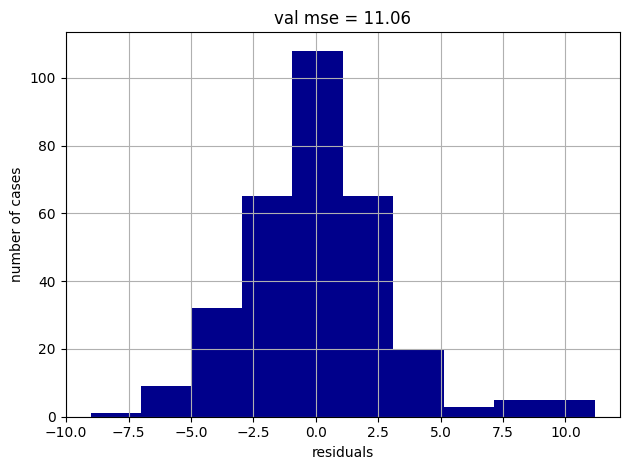

In [53]:
model = "mpg ~ I(np.log(cylinders)) + I(np.log(displacement)) + I(np.log(horsepower)) + I(np.log(weight)) + \
    I(np.log(acceleration)) + year + origin"
result, mse = linearRegression(df, model, seed)
result.resid.hist(color="darkblue")
plt.xlabel("residuals")
plt.ylabel("number of cases")
plt.title(f"val mse = {mse['valid']:.2f}")
plt.tight_layout()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     283.4
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          9.65e-122
Time:                        22:21:28   Log-Likelihood:                -782.61
No. Observations:                 313   AIC:                             1579.
Df Residuals:                     306   BIC:                             1605.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 106.8492      9.334     11.447      0.000      88.482     125.216
origin[T.2]                 1.8641      0.547      3.408      0.001       0.788       2.941
origin[T.3]                 1.8525      0.542      3.419      0.001       0.786       2.919
I(np.log(horsepower))      -6.6236      1.720     -3.851      0.000     -10.008      -3.239
I(np.log(weight))         -12.2587      1.727     -7.098      0.000     -15.657      -8.860
I(np.log(acceleration))    -4.2946      1.708     -2.515      0.012      -7.655      -0.934
year                        0.7296      0.052     14.106      0.000       0.628       0.831
==============================================================================
Omnibus:                       33.696   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.075
Skew:                           0.591   Prob(JB):                     4.49e-15
Kurtosis:                       4.916   Cond. No.                     4.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

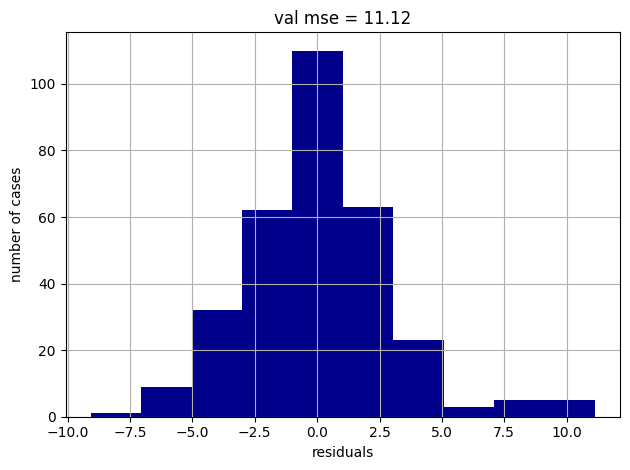

In [54]:
model = "mpg ~ I(np.log(horsepower)) + I(np.log(weight)) + I(np.log(acceleration)) + year + origin"
result, mse = linearRegression(df, model, seed)
result.resid.hist(color="darkblue")
plt.xlabel("residuals")
plt.ylabel("number of cases")
plt.title(f"val mse = {mse['valid']:.2f}")
plt.tight_layout()
result.summary()

154   -0.255173
277   -0.244467
155   -0.235411
275   -0.224257
111   -0.216362
Name: Leverage, dtype: float64
244    0.288398
325    0.335218
327    0.358852
393    0.377693
326    0.503691
Name: Leverage, dtype: float64


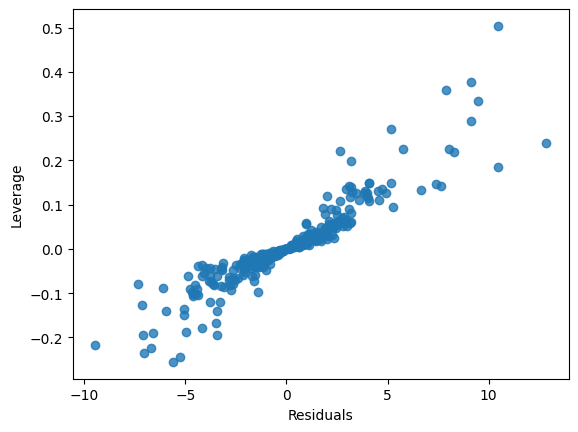

In [55]:
result,_ = linearRegression(df, model)
residuals = pd.Series(result.resid, name="Residuals")
leverage = pd.Series(OLSInfluence(result).influence, name="Leverage")
_ = sns.regplot(x=residuals, y=leverage, fit_reg=False)

print(leverage.sort_values().head())
print(leverage.sort_values().tail())

In [56]:
obs_to_drop = leverage.sort_values().head().index.tolist() + leverage.sort_values().tail().index.tolist()
obs_to_drop

[154, 277, 155, 275, 111, 244, 325, 327, 393, 326]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     321.9
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          8.84e-127
Time:                        22:21:29   Log-Likelihood:                -732.33
No. Observations:                 304   AIC:                             1479.
Df Residuals:                     297   BIC:                             1505.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 118.1081      8.611     13.716      0.000     101.162     135.054
origin[T.2]                 1.2215      0.489      2.499      0.013       0.259       2.184
origin[T.3]                 2.2174      0.513      4.319      0.000       1.207       3.228
I(np.log(horsepower))      -5.7000      1.596     -3.572      0.000      -8.840      -2.560
I(np.log(weight))         -13.5930      1.608     -8.451      0.000     -16.758     -10.428
I(np.log(acceleration))    -4.9494      1.540     -3.214      0.001      -7.980      -1.919
year                        0.6886      0.047     14.527      0.000       0.595       0.782
==============================================================================
Omnibus:                       35.176   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.894
Skew:                           0.560   Prob(JB):                     6.06e-19
Kurtosis:                       5.317   Cond. No.                     4.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

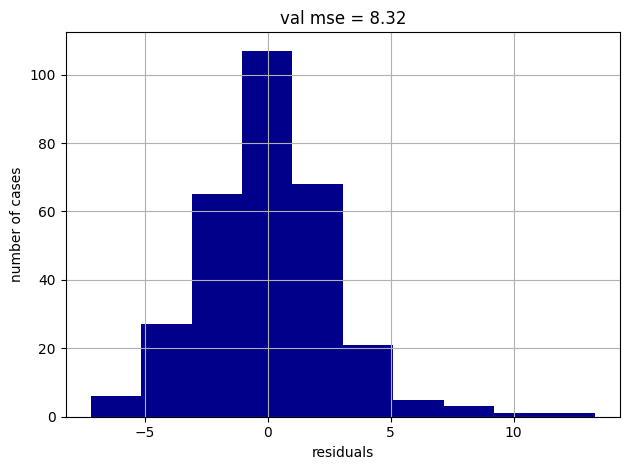

In [57]:
df2 = df.drop(obs_to_drop)

model = "mpg ~ I(np.log(horsepower)) + I(np.log(weight)) + I(np.log(acceleration)) + year + origin"
result, mse = linearRegression(df2, model, seed)
result.resid.hist(color="darkblue")
plt.xlabel("residuals")
plt.ylabel("number of cases")
plt.title(f"val mse = {mse['valid']:.2f}")
plt.tight_layout()
result.summary()